In [ ]:
# this will ask you to authenticate with Google
from google.colab import drive
drive.mount('/content/drive')
 
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Uny/DMT/Assignment 2')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

import seaborn as sns
sns.set_style("darkgrid")

In [2]:
#Read the training data from the provided file and save it in the variable dataset as a DataFrame object
train_dataset = pd.read_csv("data/training_set_VU_DM.csv")
train_dataset

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958342,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,77700,3,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4958343,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,88083,3,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4958344,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,94508,3,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4958345,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,128360,3,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,157.84,1


In [4]:
#Read the test data from the provided file and save it in the variable dataset as a DataFrame object
test_dataset = pd.read_csv("data/test_set_VU_DM.csv")
test_dataset

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff
0,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,3180,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,5543,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,14142,2,3.5,...,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,22393,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,24194,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959178,332787,2013-05-21 11:06:37,24,216,NaN,NaN,117,32019,4,3.5,...,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4959179,332787,2013-05-21 11:06:37,24,216,NaN,NaN,117,33959,4,3.0,...,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4959180,332787,2013-05-21 11:06:37,24,216,NaN,NaN,117,35240,4,0.0,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4959181,332787,2013-05-21 11:06:37,24,216,NaN,NaN,117,94437,4,0.0,...,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Obtain the frequency of the number of missing value for each column
def obtain_freq_of_missing_values(dataframe):
    """
    Returns the frequency of missing values for each column
    """
    freq_of_missing_values = dataframe.isnull().sum() / len(dataframe)
    return freq_of_missing_values

In [6]:
train_miss_attr = obtain_freq_of_missing_values(train_dataset)
train_miss_attr

srch_id                        0.000000
date_time                      0.000000
site_id                        0.000000
visitor_location_country_id    0.000000
visitor_hist_starrating        0.949204
visitor_hist_adr_usd           0.948977
prop_country_id                0.000000
prop_id                        0.000000
prop_starrating                0.000000
prop_review_score              0.001485
prop_brand_bool                0.000000
prop_location_score1           0.000000
prop_location_score2           0.219902
prop_log_historical_price      0.000000
position                       0.000000
price_usd                      0.000000
promotion_flag                 0.000000
srch_destination_id            0.000000
srch_length_of_stay            0.000000
srch_booking_window            0.000000
srch_adults_count              0.000000
srch_children_count            0.000000
srch_room_count                0.000000
srch_saturday_night_bool       0.000000
srch_query_affinity_score      0.935986


In [7]:
test_miss_attr = obtain_freq_of_missing_values(test_dataset)
test_miss_attr

srch_id                        0.000000
date_time                      0.000000
site_id                        0.000000
visitor_location_country_id    0.000000
visitor_hist_starrating        0.948897
visitor_hist_adr_usd           0.948656
prop_country_id                0.000000
prop_id                        0.000000
prop_starrating                0.000000
prop_review_score              0.001465
prop_brand_bool                0.000000
prop_location_score1           0.000000
prop_location_score2           0.219397
prop_log_historical_price      0.000000
price_usd                      0.000000
promotion_flag                 0.000000
srch_destination_id            0.000000
srch_length_of_stay            0.000000
srch_booking_window            0.000000
srch_adults_count              0.000000
srch_children_count            0.000000
srch_room_count                0.000000
srch_saturday_night_bool       0.000000
srch_query_affinity_score      0.935845
orig_destination_distance      0.324384


In [8]:
#Eliminates the columns that have more than 10% of theier data missing 
def eliminate_columns(dataframe, attr_freq, cutoff_value=0.1):
    """
    Eliminates the attributes that have a missing frequency over 10%
    """
    attributes_to_del = attr_freq[attr_freq > cutoff_value].axes[0].tolist()
    new_dataset = dataframe.drop(columns=attributes_to_del) 
    return new_dataset

In [9]:
#Eliminates the columns from the training dataset that have more 10% of their data missing
train_dataset = eliminate_columns(train_dataset, train_miss_attr)
train_dataset

,srch_id,date_time,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,...,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,random_bool,click_bool,booking_bool
0,1,2013-04-04 08:32:15,12,187,219,893,3,3.5,1,2.83,...,23246,1,0,4,0,1,1,1,0,0
1,1,2013-04-04 08:32:15,12,187,219,10404,4,4.0,1,2.20,...,23246,1,0,4,0,1,1,1,0,0
2,1,2013-04-04 08:32:15,12,187,219,21315,3,4.5,1,2.20,...,23246,1,0,4,0,1,1,1,0,0
3,1,2013-04-04 08:32:15,12,187,219,27348,2,4.0,1,2.83,...,23246,1,0,4,0,1,1,1,0,0
4,1,2013-04-04 08:32:15,12,187,219,29604,4,3.5,1,2.64,...,23246,1,0,4,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958342,332785,2013-06-30 19:55:18,5,219,219,77700,3,4.0,1,1.61,...,16974,1,21,3,0,1,0,0,0,0
4958343,332785,2013-06-30 19:55:18,5,219,219,88083,3,4.0,1,1.95,...,16974,1,21,3,0,1,0,0,0,0
4958344,332785,2013-06-30 19:55:18,5,219,219,94508,3,3.5,1,1.10,...,16974,1,21,3,0,1,0,0,0,0
4958345,332785,2013-06-30 19:55:18,5,219,219,128360,3,5.0,1,1.95,...,16974,1,21,3,0,1,0,0,1,1


In [10]:
#Eliminates the columns from the test dataset that have more 10% of their data missing
test_dataset = eliminate_columns(test_dataset, test_miss_attr)
test_dataset

,srch_id,date_time,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,...,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,random_bool
0,1,2013-02-02 15:27:40,24,216,219,3180,3,4.5,1,2.94,...,119.00,0,19222,1,10,2,0,1,0,0
1,1,2013-02-02 15:27:40,24,216,219,5543,3,4.5,1,2.64,...,118.00,0,19222,1,10,2,0,1,0,0
2,1,2013-02-02 15:27:40,24,216,219,14142,2,3.5,1,2.71,...,49.00,0,19222,1,10,2,0,1,0,0
3,1,2013-02-02 15:27:40,24,216,219,22393,3,4.5,1,2.40,...,143.00,0,19222,1,10,2,0,1,0,0
4,1,2013-02-02 15:27:40,24,216,219,24194,3,4.5,1,2.94,...,79.00,0,19222,1,10,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959178,332787,2013-05-21 11:06:37,24,216,117,32019,4,3.5,0,2.48,...,66.07,0,19246,2,7,1,0,1,0,0
4959179,332787,2013-05-21 11:06:37,24,216,117,33959,4,3.0,1,2.20,...,67.10,0,19246,2,7,1,0,1,0,0
4959180,332787,2013-05-21 11:06:37,24,216,117,35240,4,0.0,0,1.79,...,73.91,0,19246,2,7,1,0,1,0,0
4959181,332787,2013-05-21 11:06:37,24,216,117,94437,4,0.0,0,2.94,...,66.07,0,19246,2,7,1,0,1,0,0


In [11]:
#Obtain the attributes that are not present in test dataset
train = obtain_freq_of_missing_values(train_dataset).axes[0].tolist()
test = obtain_freq_of_missing_values(test_dataset).axes[0].tolist()
for attr in train:
    if attr not in test:
        print(attr)

position
click_bool
booking_bool


In [12]:
#Fill all the nan values from the review score column with the median of the dataset for the training and testing dataset
train_dataset['prop_review_score'].fillna(train_dataset['prop_review_score'].median(), inplace=True)
test_dataset['prop_review_score'].fillna(test_dataset['prop_review_score'].median(), inplace=True)

In [13]:
obtain_freq_of_missing_values(train_dataset)

srch_id                        0.0
date_time                      0.0
site_id                        0.0
visitor_location_country_id    0.0
prop_country_id                0.0
prop_id                        0.0
prop_starrating                0.0
prop_review_score              0.0
prop_brand_bool                0.0
prop_location_score1           0.0
prop_log_historical_price      0.0
position                       0.0
price_usd                      0.0
promotion_flag                 0.0
srch_destination_id            0.0
srch_length_of_stay            0.0
srch_booking_window            0.0
srch_adults_count              0.0
srch_children_count            0.0
srch_room_count                0.0
srch_saturday_night_bool       0.0
random_bool                    0.0
click_bool                     0.0
booking_bool                   0.0
dtype: float64

In [14]:
obtain_freq_of_missing_values(test_dataset)

srch_id                        0.0
date_time                      0.0
site_id                        0.0
visitor_location_country_id    0.0
prop_country_id                0.0
prop_id                        0.0
prop_starrating                0.0
prop_review_score              0.0
prop_brand_bool                0.0
prop_location_score1           0.0
prop_log_historical_price      0.0
price_usd                      0.0
promotion_flag                 0.0
srch_destination_id            0.0
srch_length_of_stay            0.0
srch_booking_window            0.0
srch_adults_count              0.0
srch_children_count            0.0
srch_room_count                0.0
srch_saturday_night_bool       0.0
random_bool                    0.0
dtype: float64

In [15]:
def separate_data(data, p=0.3):
    """Separate the data into training data and validation data, based on a specified procentage"""
    valid_data_len = int(len(data) * p)
    train_data = data[:-valid_data_len]
    valid_data = data[-valid_data_len:]
    return train_data, valid_data

In [16]:
training_data, validation_data = separate_data(train_dataset)

In [17]:
training_data

,srch_id,date_time,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,...,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,random_bool,click_bool,booking_bool
0,1,2013-04-04 08:32:15,12,187,219,893,3,3.5,1,2.83,...,23246,1,0,4,0,1,1,1,0,0
1,1,2013-04-04 08:32:15,12,187,219,10404,4,4.0,1,2.20,...,23246,1,0,4,0,1,1,1,0,0
2,1,2013-04-04 08:32:15,12,187,219,21315,3,4.5,1,2.20,...,23246,1,0,4,0,1,1,1,0,0
3,1,2013-04-04 08:32:15,12,187,219,27348,2,4.0,1,2.83,...,23246,1,0,4,0,1,1,1,0,0
4,1,2013-04-04 08:32:15,12,187,219,29604,4,3.5,1,2.64,...,23246,1,0,4,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3470838,233039,2013-05-19 11:53:45,5,219,219,52908,3,4.0,1,1.61,...,4687,4,18,2,1,1,1,0,0,0
3470839,233039,2013-05-19 11:53:45,5,219,219,61253,2,3.0,1,0.69,...,4687,4,18,2,1,1,1,0,0,0
3470840,233039,2013-05-19 11:53:45,5,219,219,66013,2,3.0,0,1.61,...,4687,4,18,2,1,1,1,0,0,0
3470841,233039,2013-05-19 11:53:45,5,219,219,71380,3,4.0,1,1.95,...,4687,4,18,2,1,1,1,0,0,0


In [18]:
validation_data

,srch_id,date_time,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,...,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,random_bool,click_bool,booking_bool
3470843,233039,2013-05-19 11:53:45,5,219,219,77380,3,4.5,1,2.83,...,4687,4,18,2,1,1,1,0,0,0
3470844,233039,2013-05-19 11:53:45,5,219,219,80151,3,4.5,1,2.83,...,4687,4,18,2,1,1,1,0,0,0
3470845,233039,2013-05-19 11:53:45,5,219,219,83874,2,3.5,1,2.48,...,4687,4,18,2,1,1,1,0,0,0
3470846,233039,2013-05-19 11:53:45,5,219,219,88579,3,5.0,1,2.83,...,4687,4,18,2,1,1,1,0,0,0
3470847,233039,2013-05-19 11:53:45,5,219,219,93036,3,4.5,1,2.08,...,4687,4,18,2,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958342,332785,2013-06-30 19:55:18,5,219,219,77700,3,4.0,1,1.61,...,16974,1,21,3,0,1,0,0,0,0
4958343,332785,2013-06-30 19:55:18,5,219,219,88083,3,4.0,1,1.95,...,16974,1,21,3,0,1,0,0,0,0
4958344,332785,2013-06-30 19:55:18,5,219,219,94508,3,3.5,1,1.10,...,16974,1,21,3,0,1,0,0,0,0
4958345,332785,2013-06-30 19:55:18,5,219,219,128360,3,5.0,1,1.95,...,16974,1,21,3,0,1,0,0,1,1


In [19]:
#Add the score 
def add_score(dataframe, click_val=1, book_val=5):
    dataframe["score"] = np.where(dataframe['click_bool'] == 1, 1, 0)
    dataframe["score"] = np.where(dataframe['booking_bool'] == 1, 5, 0)

In [20]:
add_score(training_data)
add_score(validation_data)

C:\Users\Helia\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Helia\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Helia\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [21]:
test_dataset["score"] = 0

<AxesSubplot:>

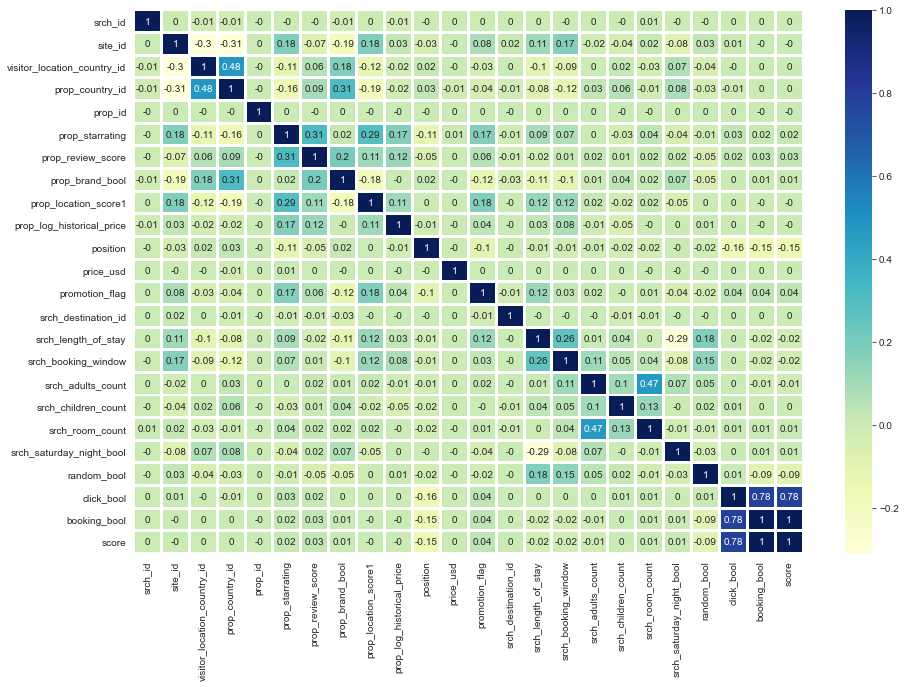

In [22]:
fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(round(training_data.corr(), 2), cmap="YlGnBu", ax=ax, linewidths=2, annot=True)

In [24]:
training_data.to_csv("data/processed_training_data.csv")
validation_data.to_csv("data/processed_validation_data.csv")
test_dataset.to_csv("data/processed_test_data.csv")